<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#passing-arrays-to-and-from-C++-lib" data-toc-modified-id="passing-arrays-to-and-from-C++-lib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>passing arrays to and from C++ lib</a></span><ul class="toc-item"><li><span><a href="#C++-code-to-run---reverse-an-integer-array" data-toc-modified-id="C++-code-to-run---reverse-an-integer-array-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>C++ code to run - reverse an integer array</a></span></li><li><span><a href="#create-int-array-in-python/numpy-&amp;-convert-to-ctype-pointer" data-toc-modified-id="create-int-array-in-python/numpy-&amp;-convert-to-ctype-pointer-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>create int array in python/numpy &amp; convert to ctype pointer</a></span></li><li><span><a href="#call-to-C++" data-toc-modified-id="call-to-C++-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>call to C++</a></span></li><li><span><a href="#back-to-python/numpy-array" data-toc-modified-id="back-to-python/numpy-array-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>back to python/numpy array</a></span></li></ul></li><li><span><a href="#C++-to-Py-:-extract-pixels-and-channels" data-toc-modified-id="C++-to-Py-:-extract-pixels-and-channels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>C++ to Py : extract pixels and channels</a></span><ul class="toc-item"><li><span><a href="#determine-image-dimensions-and-channels" data-toc-modified-id="determine-image-dimensions-and-channels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>determine image dimensions and channels</a></span></li><li><span><a href="#call-to-C++---get-image-as-int-array-pointer" data-toc-modified-id="call-to-C++---get-image-as-int-array-pointer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>call to C++ - get image as int array pointer</a></span></li><li><span><a href="#play-with-color-channels" data-toc-modified-id="play-with-color-channels-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>play with color channels</a></span></li><li><span><a href="#pixel-extraction-in-python" data-toc-modified-id="pixel-extraction-in-python-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>pixel extraction in python</a></span></li></ul></li><li><span><a href="#Max-Pooling-Convolution-of-Single-Channel-with-2-x-2-Kernel" data-toc-modified-id="Max-Pooling-Convolution-of-Single-Channel-with-2-x-2-Kernel-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Max Pooling Convolution of Single Channel with 2 x 2 Kernel</a></span></li></ul></div>

# Building AI from Dirt

## passing arrays to and from C++ lib

### C++ code to run - reverse an integer array

C++ code - will not run here

In [ ]:
extern "C"
int *reverse_array(const int *input_array, const int size) {
    int *rev_array = new int[size];
    for (int i = 0; i < size; i++) {
        rev_array[size - i] = input_array[i];
    }
    return rev_array;
}

In [84]:
import numpy as np
import ctypes
from ctypes import *

### create int array in python/numpy & convert to ctype pointer

In [85]:
primes = np.array([2,3,5,7,11])

In [86]:
primes.shape

(5,)

In [87]:
primes.tolist()

[2, 3, 5, 7, 11]

In [88]:
ptr_primes = pointer((ctypes.c_int * 5)(*primes))

### call to C++

In [90]:
reverse_array = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').reverse_array
reverse_array.restype = ctypes.POINTER(ctypes.c_int * 5)
result = reverse_array(ptr_primes,5)

In [91]:
print(result.contents)

In [92]:
for p in result.contents:
    print(p)

11
7
5
3
2


### back to python/numpy array

In [93]:
primes.shape

(5,)

In [94]:
np_primes = np.ctypeslib.as_array(result,shape=(1,)).reshape(primes.shape)

In [95]:
np_primes.shape

(5,)

In [96]:
np_primes.tolist()

[11, 7, 5, 3, 2]

## C++ to Py : extract pixels and channels

In [125]:
!sips -g pixelHeight -g pixelWidth /Users/Bhill/git/AI_From_Dirt/two.png

/Users/Bhill/git/AI_From_Dirt/two.png
  pixelHeight: 59
  pixelWidth: 46


![tow](two.png)

In [126]:
image_file = '/Users/Bhill/git/AI_From_Dirt/two.40x40.png'
!cp two.png {image_file} ; sips -z 40 40 {image_file}

/Users/Bhill/git/AI_From_Dirt/two.40x40.png
  /Users/Bhill/git/AI_From_Dirt/two.40x40.png


![two](two.40x40.png)

### determine image dimensions and channels

In [127]:
!identify {image_file}

h = !identify -format '%h' {image_file}
h = int(h[0])
print('h = ' , h)

w = !identify -format '%w' {image_file}
w = int(w[0])
print('w = ' , w)


/Users/Bhill/git/AI_From_Dirt/two.40x40.png PNG 40x40 40x40+0+0 8-bit sRGB 4817B 0.000u 0:00.000
h =  40
w =  40


### call to C++ - get image as int array pointer

**shared** lib from C++ / C, might have dylib extension
**NOTE** you must put .encode() on strings passed to C++/C due to endian encoding
explained in answer at https://stackoverflow.com/questions/52916077/calling-c-function-from-python

In [128]:
import ctypes
from ctypes import *
import numpy as np
from PIL import Image

get_data = cdll.LoadLibrary('./cmake-build-debug/libdirt_lib.dylib').get_data
get_data.restype = ctypes.POINTER(ctypes.c_int * (h*w*3))
result = get_data(image_file.encode())

In [129]:
bgr_pixels = np.ctypeslib.as_array(result,shape=(1,)).reshape((h*w*3)).tolist()
len(bgr_pixels)

4800

### play with color channels

In [130]:
blue = list()
green = list()
red = list()
for i, bgr in enumerate(bgr_pixels):
    if i%3 is 0:
        blue.append(bgr)
    if i%3 is 1:
        green.append(bgr)
    if i%3 is 2:
        red.append(bgr)   

higher intensity means lighter grey in grey scale

orig


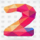

red


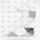

blue


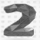

green


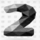

In [131]:
print('higher intensity means lighter grey in grey scale\n')
print('orig')
display(Image.open(image_file))
im2 = Image.new('L', (w,h))
print('red')
im2.putdata(red)
display(im2)
print('blue')
im2.putdata(blue)
display(im2)
print('green')
im2.putdata(green)
display(im2)

### pixel extraction in python

In [120]:
py_flat_pixels = np.array(img).flatten().tolist()
print((int)(len(flat_pixels)/4))
print(h)
print(w)
frame_size = h*w
print(frame_size)
red = flat_pixels[0:frame_size-1]
green = flat_pixels[frame_size:(frame_size*2)-1]
blue = flat_pixels[(frame_size*2):(frame_size*3)-1]
alpha = flat_pixels[(frame_size*3):(frame_size*4)-1]
flat_pixels[0:10]

225
40
40
1600


[235, 237, 239, 255, 234, 235, 238, 255, 240, 243]

## Max Pooling Convolution of Single Channel with 2 x 2 Kernel

Apply a 2x2 sliding window around image, starting at top-left, returning the max of those for pixels

In [159]:
green

[239,
 239,
 237,
 239,
 242,
 242,
 242,
 243,
 243,
 242,
 244,
 245,
 246,
 246,
 243,
 242,
 243,
 245,
 246,
 245,
 243,
 243,
 242,
 245,
 245,
 245,
 243,
 241,
 242,
 242,
 242,
 242,
 240,
 240,
 239,
 239,
 238,
 238,
 237,
 237,
 239,
 230,
 225,
 225,
 236,
 244,
 245,
 238,
 228,
 229,
 234,
 244,
 246,
 245,
 233,
 233,
 237,
 245,
 246,
 246,
 240,
 230,
 231,
 241,
 246,
 245,
 240,
 230,
 229,
 232,
 241,
 243,
 242,
 229,
 226,
 230,
 236,
 240,
 238,
 232,
 240,
 231,
 225,
 226,
 237,
 246,
 247,
 240,
 228,
 230,
 237,
 246,
 247,
 246,
 234,
 234,
 238,
 248,
 247,
 249,
 240,
 231,
 232,
 242,
 249,
 249,
 240,
 227,
 227,
 234,
 243,
 245,
 243,
 230,
 228,
 231,
 239,
 243,
 240,
 233,
 242,
 241,
 240,
 240,
 241,
 245,
 247,
 245,
 242,
 241,
 243,
 247,
 247,
 240,
 230,
 225,
 227,
 230,
 232,
 231,
 228,
 227,
 228,
 231,
 227,
 221,
 237,
 243,
 239,
 243,
 247,
 245,
 242,
 241,
 240,
 240,
 243,
 243,
 242,
 238,
 246,
 246,
 245,
 246,
 247,
 247,
 247

In [181]:
# i = index, p = pixel intensity
new_image = list()
print(len(green))
print()
for i,g in enumerate(green):

    if i > w * (h-1):
        break
    if i % w == 0 and i != 0:
        continue
    print(i, ': ' ,i, '-' , (i+1) , '-', (i+w),'-',(i+1+w))
    print(i, ': ' ,green[i], '-' , green[(i+1)] , '-', green[(i+w)],'-',green[(i+1+w)])
    #sum = green[i] + green[i+1] + green[i+w] + green[i+1+w]
    #new_image.append(np.max(green[i] , green[i+2] , green[i+w] , green[i+1+w]))

1600

0 :  0 - 1 - 40 - 41
0 :  239 - 239 - 239 - 230
1 :  1 - 2 - 41 - 42
1 :  239 - 237 - 230 - 225
2 :  2 - 3 - 42 - 43
2 :  237 - 239 - 225 - 225
3 :  3 - 4 - 43 - 44
3 :  239 - 242 - 225 - 236
4 :  4 - 5 - 44 - 45
4 :  242 - 242 - 236 - 244
5 :  5 - 6 - 45 - 46
5 :  242 - 242 - 244 - 245
6 :  6 - 7 - 46 - 47
6 :  242 - 243 - 245 - 238
7 :  7 - 8 - 47 - 48
7 :  243 - 243 - 238 - 228
8 :  8 - 9 - 48 - 49
8 :  243 - 242 - 228 - 229
9 :  9 - 10 - 49 - 50
9 :  242 - 244 - 229 - 234
10 :  10 - 11 - 50 - 51
10 :  244 - 245 - 234 - 244
11 :  11 - 12 - 51 - 52
11 :  245 - 246 - 244 - 246
12 :  12 - 13 - 52 - 53
12 :  246 - 246 - 246 - 245
13 :  13 - 14 - 53 - 54
13 :  246 - 243 - 245 - 233
14 :  14 - 15 - 54 - 55
14 :  243 - 242 - 233 - 233
15 :  15 - 16 - 55 - 56
15 :  242 - 243 - 233 - 237
16 :  16 - 17 - 56 - 57
16 :  243 - 245 - 237 - 245
17 :  17 - 18 - 57 - 58
17 :  245 - 246 - 245 - 246
18 :  18 - 19 - 58 - 59
18 :  246 - 245 - 246 - 246
19 :  19 - 20 - 59 - 60
19 :  245 - 243 - 246

285 :  190 - 186 - 189 - 189
286 :  286 - 287 - 326 - 327
286 :  186 - 181 - 189 - 185
287 :  287 - 288 - 327 - 328
287 :  181 - 170 - 185 - 177
288 :  288 - 289 - 328 - 329
288 :  170 - 175 - 177 - 165
289 :  289 - 290 - 329 - 330
289 :  175 - 193 - 165 - 161
290 :  290 - 291 - 330 - 331
290 :  193 - 208 - 161 - 155
291 :  291 - 292 - 331 - 332
291 :  208 - 210 - 155 - 143
292 :  292 - 293 - 332 - 333
292 :  210 - 207 - 143 - 133
293 :  293 - 294 - 333 - 334
293 :  207 - 197 - 133 - 121
294 :  294 - 295 - 334 - 335
294 :  197 - 197 - 121 - 120
295 :  295 - 296 - 335 - 336
295 :  197 - 182 - 120 - 108
296 :  296 - 297 - 336 - 337
296 :  182 - 138 - 108 - 46
297 :  297 - 298 - 337 - 338
297 :  138 - 90 - 46 - 26
298 :  298 - 299 - 338 - 339
298 :  90 - 53 - 26 - 34
299 :  299 - 300 - 339 - 340
299 :  53 - 47 - 34 - 38
300 :  300 - 301 - 340 - 341
300 :  47 - 49 - 38 - 40
301 :  301 - 302 - 341 - 342
301 :  49 - 55 - 40 - 37
302 :  302 - 303 - 342 - 343
302 :  55 - 49 - 37 - 41
303 :  30

456 :  160 - 119 - 241 - 247
457 :  457 - 458 - 497 - 498
457 :  119 - 84 - 247 - 240
458 :  458 - 459 - 498 - 499
458 :  84 - 52 - 240 - 219
459 :  459 - 460 - 499 - 500
459 :  52 - 26 - 219 - 175
460 :  460 - 461 - 500 - 501
460 :  26 - 35 - 175 - 119
461 :  461 - 462 - 501 - 502
461 :  35 - 45 - 119 - 63
462 :  462 - 463 - 502 - 503
462 :  45 - 49 - 63 - 84
463 :  463 - 464 - 503 - 504
463 :  49 - 53 - 84 - 86
464 :  464 - 465 - 504 - 505
464 :  53 - 66 - 86 - 86
465 :  465 - 466 - 505 - 506
465 :  66 - 80 - 86 - 87
466 :  466 - 467 - 506 - 507
466 :  80 - 89 - 87 - 89
467 :  467 - 468 - 507 - 508
467 :  89 - 83 - 89 - 78
468 :  468 - 469 - 508 - 509
468 :  83 - 60 - 78 - 56
469 :  469 - 470 - 509 - 510
469 :  60 - 52 - 56 - 51
470 :  470 - 471 - 510 - 511
470 :  52 - 50 - 51 - 51
471 :  471 - 472 - 511 - 512
471 :  50 - 48 - 51 - 51
472 :  472 - 473 - 512 - 513
472 :  48 - 53 - 51 - 56
473 :  473 - 474 - 513 - 514
473 :  53 - 55 - 56 - 51
474 :  474 - 475 - 514 - 515
474 :  55 - 12

627 :  627 - 628 - 667 - 668
627 :  69 - 78 - 43 - 59
628 :  628 - 629 - 668 - 669
628 :  78 - 53 - 59 - 38
629 :  629 - 630 - 669 - 670
629 :  53 - 38 - 38 - 14
630 :  630 - 631 - 670 - 671
630 :  38 - 23 - 14 - 6
631 :  631 - 632 - 671 - 672
631 :  23 - 9 - 6 - 8
632 :  632 - 633 - 672 - 673
632 :  9 - 11 - 8 - 14
633 :  633 - 634 - 673 - 674
633 :  11 - 24 - 14 - 47
634 :  634 - 635 - 674 - 675
634 :  24 - 129 - 47 - 171
635 :  635 - 636 - 675 - 676
635 :  129 - 252 - 171 - 245
636 :  636 - 637 - 676 - 677
636 :  252 - 248 - 245 - 247
637 :  637 - 638 - 677 - 678
637 :  248 - 246 - 247 - 246
638 :  638 - 639 - 678 - 679
638 :  246 - 241 - 246 - 235
639 :  639 - 640 - 679 - 680
639 :  241 - 246 - 235 - 246
641 :  641 - 642 - 681 - 682
641 :  238 - 227 - 238 - 233
642 :  642 - 643 - 682 - 683
642 :  227 - 228 - 233 - 235
643 :  643 - 644 - 683 - 684
643 :  228 - 240 - 235 - 242
644 :  644 - 645 - 684 - 685
644 :  240 - 247 - 242 - 247
645 :  645 - 646 - 685 - 686
645 :  247 - 247 - 24

797 :  247 - 247 - 247 - 246
798 :  798 - 799 - 838 - 839
798 :  247 - 248 - 246 - 242
799 :  799 - 800 - 839 - 840
799 :  248 - 246 - 242 - 246
801 :  801 - 802 - 841 - 842
801 :  241 - 238 - 233 - 226
802 :  802 - 803 - 842 - 843
802 :  238 - 237 - 226 - 224
803 :  803 - 804 - 843 - 844
803 :  237 - 242 - 224 - 238
804 :  804 - 805 - 844 - 845
804 :  242 - 246 - 238 - 246
805 :  805 - 806 - 845 - 846
805 :  246 - 247 - 246 - 247
806 :  806 - 807 - 846 - 847
806 :  247 - 245 - 247 - 242
807 :  807 - 808 - 847 - 848
807 :  245 - 239 - 242 - 228
808 :  808 - 809 - 848 - 849
808 :  239 - 238 - 228 - 229
809 :  809 - 810 - 849 - 850
809 :  238 - 238 - 229 - 231
810 :  810 - 811 - 850 - 851
810 :  238 - 244 - 231 - 243
811 :  811 - 812 - 851 - 852
811 :  244 - 246 - 243 - 247
812 :  812 - 813 - 852 - 853
812 :  246 - 246 - 247 - 246
813 :  813 - 814 - 853 - 854
813 :  246 - 236 - 246 - 230
814 :  814 - 815 - 854 - 855
814 :  236 - 239 - 230 - 217
815 :  815 - 816 - 855 - 856
815 :  239 - 2

969 :  969 - 970 - 1009 - 1010
969 :  248 - 240 - 231 - 204
970 :  970 - 971 - 1010 - 1011
970 :  240 - 208 - 204 - 190
971 :  971 - 972 - 1011 - 1012
971 :  208 - 177 - 190 - 191
972 :  972 - 973 - 1012 - 1013
972 :  177 - 167 - 191 - 194
973 :  973 - 974 - 1013 - 1014
973 :  167 - 165 - 194 - 198
974 :  974 - 975 - 1014 - 1015
974 :  165 - 167 - 198 - 203
975 :  975 - 976 - 1015 - 1016
975 :  167 - 171 - 203 - 206
976 :  976 - 977 - 1016 - 1017
976 :  171 - 183 - 206 - 204
977 :  977 - 978 - 1017 - 1018
977 :  183 - 191 - 204 - 161
978 :  978 - 979 - 1018 - 1019
978 :  191 - 144 - 161 - 102
979 :  979 - 980 - 1019 - 1020
979 :  144 - 55 - 102 - 87
980 :  980 - 981 - 1020 - 1021
980 :  55 - 31 - 87 - 60
981 :  981 - 982 - 1021 - 1022
981 :  31 - 27 - 60 - 37
982 :  982 - 983 - 1022 - 1023
982 :  27 - 31 - 37 - 34
983 :  983 - 984 - 1023 - 1024
983 :  31 - 33 - 34 - 33
984 :  984 - 985 - 1024 - 1025
984 :  33 - 33 - 33 - 27
985 :  985 - 986 - 1025 - 1026
985 :  33 - 30 - 27 - 75
986 : 

1140 :  1140 - 1141 - 1180 - 1181
1140 :  99 - 105 - 116 - 114
1141 :  1141 - 1142 - 1181 - 1182
1141 :  105 - 108 - 114 - 115
1142 :  1142 - 1143 - 1182 - 1183
1142 :  108 - 118 - 115 - 117
1143 :  1143 - 1144 - 1183 - 1184
1143 :  118 - 119 - 117 - 118
1144 :  1144 - 1145 - 1184 - 1185
1144 :  119 - 117 - 118 - 115
1145 :  1145 - 1146 - 1185 - 1186
1145 :  117 - 115 - 115 - 114
1146 :  1146 - 1147 - 1186 - 1187
1146 :  115 - 114 - 114 - 111
1147 :  1147 - 1148 - 1187 - 1188
1147 :  114 - 119 - 111 - 111
1148 :  1148 - 1149 - 1188 - 1189
1148 :  119 - 119 - 111 - 120
1149 :  1149 - 1150 - 1189 - 1190
1149 :  119 - 120 - 120 - 135
1150 :  1150 - 1151 - 1190 - 1191
1150 :  120 - 132 - 135 - 130
1151 :  1151 - 1152 - 1191 - 1192
1151 :  132 - 152 - 130 - 107
1152 :  1152 - 1153 - 1192 - 1193
1152 :  152 - 212 - 107 - 116
1153 :  1153 - 1154 - 1193 - 1194
1153 :  212 - 245 - 116 - 231
1154 :  1154 - 1155 - 1194 - 1195
1154 :  245 - 247 - 231 - 244
1155 :  1155 - 1156 - 1195 - 1196
1155 : 

1310 :  43 - 45 - 24 - 32
1311 :  1311 - 1312 - 1351 - 1352
1311 :  45 - 46 - 32 - 34
1312 :  1312 - 1313 - 1352 - 1353
1312 :  46 - 74 - 34 - 68
1313 :  1313 - 1314 - 1353 - 1354
1313 :  74 - 216 - 68 - 231
1314 :  1314 - 1315 - 1354 - 1355
1314 :  216 - 235 - 231 - 247
1315 :  1315 - 1316 - 1355 - 1356
1315 :  235 - 243 - 247 - 246
1316 :  1316 - 1317 - 1356 - 1357
1316 :  243 - 247 - 246 - 247
1317 :  1317 - 1318 - 1357 - 1358
1317 :  247 - 246 - 247 - 247
1318 :  1318 - 1319 - 1358 - 1359
1318 :  246 - 240 - 247 - 247
1319 :  1319 - 1320 - 1359 - 1360
1319 :  240 - 247 - 247 - 247
1321 :  1321 - 1322 - 1361 - 1362
1321 :  247 - 250 - 246 - 250
1322 :  1322 - 1323 - 1362 - 1363
1322 :  250 - 192 - 250 - 196
1323 :  1323 - 1324 - 1363 - 1364
1323 :  192 - 76 - 196 - 66
1324 :  1324 - 1325 - 1364 - 1365
1324 :  76 - 67 - 66 - 37
1325 :  1325 - 1326 - 1365 - 1366
1325 :  67 - 63 - 37 - 29
1326 :  1326 - 1327 - 1366 - 1367
1326 :  63 - 45 - 29 - 33
1327 :  1327 - 1328 - 1367 - 1368
1327

1482 :  1482 - 1483 - 1522 - 1523
1482 :  235 - 234 - 246 - 245
1483 :  1483 - 1484 - 1523 - 1524
1483 :  234 - 241 - 245 - 242
1484 :  1484 - 1485 - 1524 - 1525
1484 :  241 - 243 - 242 - 242
1485 :  1485 - 1486 - 1525 - 1526
1485 :  243 - 245 - 242 - 241
1486 :  1486 - 1487 - 1526 - 1527
1486 :  245 - 248 - 241 - 240
1487 :  1487 - 1488 - 1527 - 1528
1487 :  248 - 238 - 240 - 237
1488 :  1488 - 1489 - 1528 - 1529
1488 :  238 - 238 - 237 - 236
1489 :  1489 - 1490 - 1529 - 1530
1489 :  238 - 243 - 236 - 235
1490 :  1490 - 1491 - 1530 - 1531
1490 :  243 - 249 - 235 - 234
1491 :  1491 - 1492 - 1531 - 1532
1491 :  249 - 249 - 234 - 234
1492 :  1492 - 1493 - 1532 - 1533
1492 :  249 - 247 - 234 - 233
1493 :  1493 - 1494 - 1533 - 1534
1493 :  247 - 236 - 233 - 231
1494 :  1494 - 1495 - 1534 - 1535
1494 :  236 - 235 - 231 - 231
1495 :  1495 - 1496 - 1535 - 1536
1495 :  235 - 237 - 231 - 231
1496 :  1496 - 1497 - 1536 - 1537
1496 :  237 - 247 - 231 - 231
1497 :  1497 - 1498 - 1537 - 1538
1497 :

IndexError: list index out of range

In [307]:
def max_2x2_kernel(mat,w):
    h=(int)(len(mat)/w)
    new_image = list()
    for i,g in enumerate(mat):
        if i >= (w*(h-1)): 
            break
        if i!= 0 and (i+1) % w == 0:
            continue
        new_image.append(max(mat[i], mat[(i+1)] ,  mat[(i+w)],mat[(i+1+w)]))
    return new_image

In [308]:
max_2x2_kernel(mat=[1,2,3,4,5,6,7,8,9,10,11,12],w=4)

[6, 7, 8, 10, 11, 12]

In [309]:
print(len(green))
green_shrunk = max_2x2_kernel(mat=green,w=40)
print(len(green_shrunk))

1600
1521


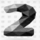

0


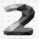

1


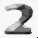

2


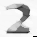

3


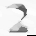

In [312]:
img = Image.new('L', (w,h))
img.putdata(green)
display(img)
data = green
for i in range(4):
    print(i)
    data = max_2x2_kernel(mat=data,w=40)
    img = Image.new('L', (w-i-1,h-i-1))
    img.putdata(data)
    display(img)
            

In [121]:
# start with (0,0) ()
# max_left, max_bottom